<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with TensorFlow

_Authors: Justin Pounders (ATL) and Riley Dalles (ATX)_

---

<a id="learning-objectives"></a>
### Learning Objectives
- Describe the basic `tensorflow` workflow.
- Create computational graphs representing basic feed-forward neural networks.
- Train neural networks using `tensorflow`
- Create and train neural networks for both regression and classification

In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Computational Graphs

---

Tensorflow is fundamentally a library for creating **computational graphs**.

![](assets/comp_graph.png)

Let's define and evaluate this "computational graph."

**There are two phases to building a `tensorflow` model.**

1. Graph construction
2. Training/evaluation

In [2]:
# Build the graph
a = tf.Variable(3, name='a')
b = tf.Variable(4, name='b')
c = a + b
d = b + 1
e = c * d

In [4]:
# Evaluate the graph
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = sess.run(e)
    print(result)

35


## Building a Neural Network for Regression

---

Let's start by building a neural net for _regression_.  These are the steps we will follow:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

For regression, we will have one output unit (neuron) with _no_ activation function.  The value of this outpu unit will be prediction of the network given whatever input values went into the input layer.

### Steps 1-4

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
# data.data is the data matrix (input features)
# data.target is the label vector


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [4]:
# tf needs matrix for y. For single value y's, they need to be reshaped
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

### Step 5: Build the network/graph

In [5]:
X_train.shape

(15480, 8)

In [6]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, (None, 8), name='Features')
y = tf.placeholder(tf.float32, (None, 1), name='Target')

h1 = tf.layers.dense(X, 8, tf.nn.relu)
y_hat = tf.layers.dense(h1, 1)

loss = tf.losses.mean_squared_error(y, y_hat)
optimizer = tf.train.AdamOptimizer(.015)
training_run = optimizer.minimize(loss)

### Step 6: Train the network

In [7]:
init = tf.global_variables_initializer()

train_losses = []
test_losses = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(200):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        train_losses.append(train_loss)
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_losses.append(test_loss)
        print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)

    pred = sess.run(y_hat, feed_dict={X: X_test})

epoch 0 train loss 3.5064144 test loss 3.4106135
epoch 1 train loss 3.1257293 test loss 3.0426455
epoch 2 train loss 2.776522 test loss 2.7043893
epoch 3 train loss 2.4614332 test loss 2.3985877
epoch 4 train loss 2.1817255 test loss 2.1265996
epoch 5 train loss 1.9379259 test loss 1.8891773
epoch 6 train loss 1.7304809 test loss 1.6859015
epoch 7 train loss 1.5587207 test loss 1.5161966
epoch 8 train loss 1.421239 test loss 1.3785329
epoch 9 train loss 1.3139273 test loss 1.2700068
epoch 10 train loss 1.232508 test loss 1.1870204
epoch 11 train loss 1.1722637 test loss 1.1254729
epoch 12 train loss 1.1281993 test loss 1.0806235
epoch 13 train loss 1.0957924 test loss 1.0478612
epoch 14 train loss 1.071147 test loss 1.0232182
epoch 15 train loss 1.0509272 test loss 1.0037255
epoch 16 train loss 1.0327401 test loss 0.9871667
epoch 17 train loss 1.0151297 test loss 0.9719866
epoch 18 train loss 0.9973737 test loss 0.9572245
epoch 19 train loss 0.97924876 test loss 0.94238234
epoch 20 tra

epoch 173 train loss 0.41812542 test loss 0.4242424
epoch 174 train loss 0.4178335 test loss 0.42395833
epoch 175 train loss 0.41754565 test loss 0.4236745
epoch 176 train loss 0.41725993 test loss 0.4233951
epoch 177 train loss 0.41697693 test loss 0.42311928
epoch 178 train loss 0.41669858 test loss 0.42284313
epoch 179 train loss 0.41642728 test loss 0.4225665
epoch 180 train loss 0.4161582 test loss 0.42228606
epoch 181 train loss 0.4158897 test loss 0.42200473
epoch 182 train loss 0.41562718 test loss 0.4217224
epoch 183 train loss 0.4153663 test loss 0.42144275
epoch 184 train loss 0.41510874 test loss 0.4211727
epoch 185 train loss 0.41485208 test loss 0.42091244
epoch 186 train loss 0.41459733 test loss 0.42065847
epoch 187 train loss 0.4143462 test loss 0.4204092
epoch 188 train loss 0.41409892 test loss 0.42016023
epoch 189 train loss 0.41385543 test loss 0.4199107
epoch 190 train loss 0.41361836 test loss 0.41965955
epoch 191 train loss 0.4133827 test loss 0.41940588
epoch 1

In [8]:
# Evaluate r^2
metrics.r2_score(y_test, pred)

0.6859853169271473

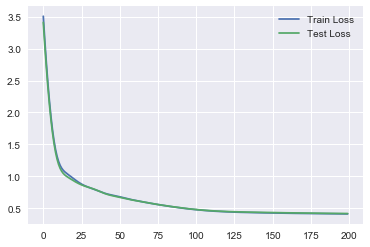

In [9]:
# Plot the learning curves
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()

## Building a Neural Network for Binary Classification

---

Now we'll build a neural net for _classification_.  We will follow the same steps as for regression:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

For _binary classification_ we will have one output unit that will represent the **probability** of "class 1."  Because we want a probability as output, we need to select an activation function that yields values between 0 and 1, i.e., sigmoid function or similar.

In [10]:
from sklearn.datasets import make_classification

features, labels = make_classification(n_samples=10000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, labels)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
#in data.target...
#  1 = benign
#  0 = malignant


In [11]:
y_test = y_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [25]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, (None, 20))
y = tf.placeholder(tf.float32, (None, 1))

h1 = tf.layers.dense(X, 20, tf.nn.relu)
h2 = tf.layers.dense(h1, 12, tf.nn.relu)
y_hat = tf.layers.dense(h2, 1, tf.nn.sigmoid) # probs, sigmoid for single class (softmax for multi)

loss = tf.losses.log_loss(y, y_hat) # binary crossentropy
optimizer = tf.train.AdamOptimizer(.015)
training_run = optimizer.minimize(loss)

In [23]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epochs in range(100):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
    pred = sess.run(y_hat, feed_dict={X: X_test})

In [15]:
classes = (pred > .5).astype(int)

In [16]:
metrics.accuracy_score(y_test, classes)

0.9328

In [ ]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, (None, 20))
y = tf.placeholder(tf.float32, (None, 1))

h1 = tf.layers.dense(X, 20, tf.nn.relu)
h2 = tf.layers.dense(h1, 12, tf.nn.relu)
y_hat = tf.layers.dense(h2, 1, tf.nn.sigmoid) # probs, sigmoid for single class (softmax for multi)

loss = tf.losses.log_loss(y, y_hat) # binary crossentropy
optimizer = tf.train.AdamOptimizer(.015)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [ ]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(20):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        
    saver.save(sess, './classification-model.ckpt')

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, './classification-model.ckpt')
    pred = sess.run(y_hat, feed_dict={X: X_test})

classes = (pred > .5).astype(int)
metrics.accuracy_score(y_test, classes)

Before moving on, let's go back and add a new hidden layer to our network...

### Batching the input

What if we can't store all of the training data in memory?

We can split the data up into "batches" and feed them to the network one at a time.  This just means that we splitting up the data and feeding it to the network one piece at a time.

You could write your own function to dole out subsets of the data one at a time, or you could use this creative hack to get `sklearn` to do it for you.  (Thanks, Riley, for showing me this!)

In [28]:
from sklearn.model_selection import train_test_split, KFold


In [30]:
batch_size = 100
num_batches = round(X_train.shape[0] / batch_size)

kf = KFold(n_splits=num_batches, shuffle=True)

In [32]:
batches = []
for train, test in kf.split(X_train, y_train):
    batches.append(test)
batches

[array([  36,  117,  167,  170,  185,  213,  274,  347,  463,  540,  779,
         784,  819,  961, 1003, 1010, 1162, 1174, 1227, 1273, 1297, 1326,
        1413, 1504, 1554, 1564, 1612, 1673, 1795, 1845, 2044, 2091, 2095,
        2111, 2114, 2187, 2203, 2221, 2322, 2486, 2580, 2710, 2870, 3022,
        3089, 3238, 3279, 3346, 3356, 3363, 3413, 3460, 3658, 3692, 3732,
        3750, 4032, 4050, 4066, 4350, 4549, 4565, 4575, 4592, 4736, 4996,
        5006, 5018, 5177, 5221, 5327, 5329, 5361, 5403, 5408, 5544, 5597,
        5612, 5644, 5660, 5733, 5813, 5894, 5913, 6014, 6016, 6072, 6127,
        6159, 6208, 6507, 6603, 6613, 6720, 6812, 6977, 7026, 7052, 7279,
        7491]),
 array([  52,  102,  140,  147,  152,  308,  317,  323,  363,  400,  420,
         441,  467,  594,  600, 1015, 1108, 1183, 1193, 1224, 1254, 1371,
        1373, 1581, 1676, 1678, 1754, 1895, 1899, 1967, 2051, 2093, 2109,
        2202, 2307, 2387, 2487, 2538, 2573, 2582, 2656, 2693, 2779, 2864,
        2901, 2963, 30

In [34]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(100):
        for batch in batches:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_run, feed_dict={X: X_batch, y: y_batch})


In [ ]:
# What are youre actual predicted classes?


In [ ]:
# What is your accuracy score?


In [ ]:
# What about your confusion matrix?


## Building a Neural Network for Multi-Class Classification

---

In _multi-class_ classification (i.e., more than 2 classes), we typically setup on output unit **per class** and use a "softmax" activation function to normalize all values between 0 and 1 so that they look like probabilities.  The output unit with the largest value corresponds to the class prediction.  (I.e., unit 3 had the highest value, so I will predict class 3.)

In [35]:
from sklearn.datasets import load_iris
import pandas as pd

In [38]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [39]:
from keras.utils import to_categorical

In [40]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [97]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, (None, 4))
y = tf.placeholder(tf.float32, (None, 3))

h1 = tf.layers.dense(X, 4, tf.nn.relu)
y_hat = tf.layers.dense(h1, 3)

loss = tf.losses.softmax_cross_entropy(y, y_hat)
optimizer = tf.train.AdadeltaOptimizer(.01)
training_run = optimizer.minimize(loss)

In [98]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(100):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
    
    pred = sess.run(y_hat, feed_dict={X: X_test})

In [99]:
classes = pred.argmax(axis=1) # Predictions on columns

In [100]:
metrics.accuracy_score(y_test.argmax(axis=1), classes)

0.23684210526315788

## Saving Your Model

---

## Practical Suggestions

---

- In binary classification, start with a single output node with a sigmoid activation function.
- For multi-class classification, have one output node for each class and use the softmax activation function.
- For hidden layers, the ReLU and hyperbolic tangent (tanh) activation functions often work well.  Start with the ReLU as your first trial.
- Start with one hidden layer, then trying adding another if performance is not good.
- For simplicity, start with the same number of units in each hidden layer, then increase this number for all hidden layers simultaneously if the performance is not good.
- Alternatively, you can use the "stretchy pants" approach and through a lot of hidden nodes into your network, but then stop training as soon as you detect the onset of overfitting.

> These suggestions are largely adapted from the book _Hands-on Machine Learning with Scikit-Learn & Tensorflow_ by Aurelien Geron, a book I highly recommend!